# Importando as bibliotecas - 1

In [ ]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
import kagglehub
import os

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Análise Exploratória dos Dados - 2


## Carregando o Dataset

In [ ]:
path = kagglehub.dataset_download("surajjha101/top-instagram-influencers-data-cleaned")

print("Path to dataset files:", path)

100%|██████████| 5.89k/5.89k [00:00<00:00, 7.18MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/surajjha101/top-instagram-influencers-data-cleaned/versions/3


In [ ]:
dataset_path = "/root/.cache/kagglehub/datasets/surajjha101/top-instagram-influencers-data-cleaned/versions/3"
print("Arquivos no dataset:", os.listdir(dataset_path))


Arquivos no dataset: ['top_insta_influencers_data.csv']


In [ ]:
file_name = "top_insta_influencers_data.csv"
file_path = os.path.join(dataset_path, file_name)

# Carregar o CSV em um DataFrame
df = pd.read_csv(file_path)

In [ ]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [ ]:
# Renomeando as colunas
df.rename(columns={'rank':'Classificação'}, inplace=True)
df.rename(columns={'channel_info': 'Nome'}, inplace=True)
df.rename(columns={'influence_score': 'Pontuação'}, inplace=True)
df.rename(columns={'posts': 'Postagens'}, inplace=True)
df.rename(columns={'followers': 'Seguidores'}, inplace=True)
df.rename(columns={'avg_likes': 'Media_Curtidas'}, inplace=True)
df.rename(columns={'60_day_eng_rate': 'Taxa_Engajamento'}, inplace=True)
df.rename(columns={'new_post_avg_like': 'Media_Curtidas_Novas'}, inplace=True)
df.rename(columns={'total_likes': 'Likes'}, inplace=True)
df.rename(columns={'country': 'País'}, inplace=True)

In [ ]:
df

,Classificação,Nome,Pontuação,Postagens,Seguidores,Media_Curtidas,Taxa_Engajamento,Media_Curtidas_Novas,Likes,País
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


## Analisando

In [ ]:
df.describe()

,Classificação,Pontuação
count,200.000000,200.000000
mean,100.500000,81.820000
std,57.879185,8.878159
min,1.000000,22.000000
25%,50.750000,80.000000
50%,100.500000,84.000000
75%,150.250000,86.000000
max,200.000000,93.000000


In [ ]:
# Verificando se há valores ausentes em alguma coluna
df.isna().sum()

,0
Classificação,0
Nome,0
Pontuação,0
Postagens,0
Seguidores,0
Media_Curtidas,0
Taxa_Engajamento,0
Media_Curtidas_Novas,0
Likes,0
País,62


In [ ]:
df.columns

Index(['Classificação', 'Nome', 'Pontuação', 'Postagens', 'Seguidores',
       'Media_Curtidas', 'Taxa_Engajamento', 'Media_Curtidas_Novas', 'Likes',
       'País'],
      dtype='object')

## Analisar as variáveis dependente e independente

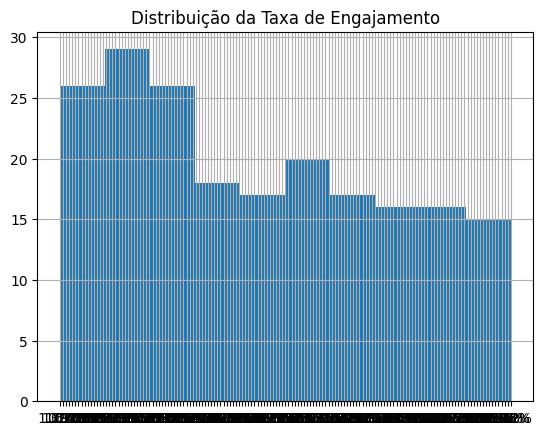

In [ ]:
df['Taxa_Engajamento'].hist()
plt.title("Distribuição da Taxa de Engajamento")
plt.show()


In [ ]:
# Criação de um novo DataFrame vazio
df_analise = pd.DataFrame()

df_analise['Nome'] = df['Nome']
df_analise['Classificação'] = df['Classificação']

# Converter os  valores numéricos com sufixos (m, k, b) para valores numéricos reais
def convert_postagens(value):
    if isinstance(value, str):  # Verifica se o valor é uma string
        if 'm' in value:
            return float(value.replace('m', '')) * 1000000
        elif 'k' in value:
            return float(value.replace('k', '')) * 1000
        elif 'b' in value:
            return float(value.replace('b', '')) * 1000000000
        else:
            return float(value)  # Caso não tenha os valores de 'm', 'k' ou 'b'
    else:
        return value  # Se já for numérico, retorna o valor como está

# substituir as strings com sufixos pelos valores numéricos
df_analise['Postagens'] = df['Postagens'].apply(convert_postagens)
df_analise['Seguidores'] = df['Seguidores'].apply(convert_postagens)
df_analise['Media_Curtidas'] = df['Media_Curtidas'].apply(convert_postagens)
df_analise['Media_Curtidas_Novas'] = df['Media_Curtidas_Novas'].apply(convert_postagens)

# Remover o símbolo % da coluna Taxa_Engajamento e converter os valores para frações, dividindo por 100
df_analise["Taxa_Engajamento"] = df["Taxa_Engajamento"].replace("%", "", regex=True)
df_analise["Taxa_Engajamento"] = df_analise["Taxa_Engajamento"].astype(float) / 100

df_analise['País'] = df['País']

In [ ]:
df_analise

,Nome,Classificação,Postagens,Seguidores,Media_Curtidas,Media_Curtidas_Novas,Taxa_Engajamento,País
0,cristiano,1,3300.0,475800000.0,8700000.0,6500000.0,0.0139,Spain
1,kyliejenner,2,6900.0,366200000.0,8300000.0,5900000.0,0.0162,United States
2,leomessi,3,890.0,357300000.0,6800000.0,4400000.0,0.0124,NaN
3,selenagomez,4,1800.0,342700000.0,6200000.0,3300000.0,0.0097,United States
4,therock,5,6800.0,334100000.0,1900000.0,665300.0,0.0020,United States
...,...,...,...,...,...,...,...,...
195,iambeckyg,196,2300.0,33200000.0,623800.0,464700.0,0.0140,United States
196,nancyajram,197,3800.0,33200000.0,390400.0,208000.0,0.0064,France
197,luansantana,198,770.0,33200000.0,193300.0,82600.0,0.0026,Brazil
198,nickjonas,199,2300.0,33000000.0,719600.0,467700.0,0.0142,United States


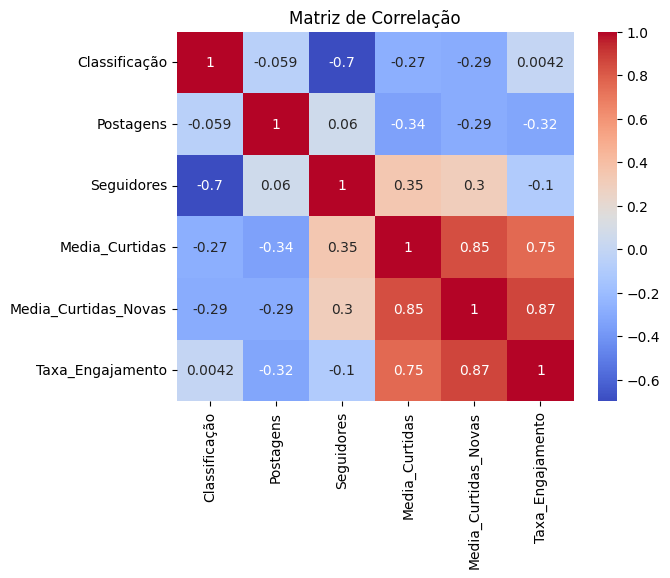

In [ ]:
df_corr = df_analise.select_dtypes(include=["float64", "int64"])

# Criar a matriz de correlação
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

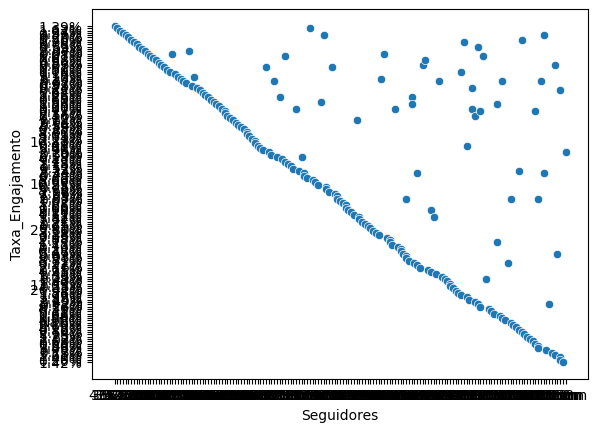

In [ ]:
# Gráfico de dispersão para verificar as relações entre variáveis independentes e a taxa de engajamento
sns.scatterplot(data=df, x="Seguidores", y="Taxa_Engajamento")
plt.show()

# Implementação do Algoritmo de Regressão Linear - 3

In [ ]:
df_analise

,Nome,Classificação,Postagens,Seguidores,Media_Curtidas,Media_Curtidas_Novas,Taxa_Engajamento,País
0,cristiano,1,3300.0,475800000.0,8700000.0,6500000.0,0.0139,Spain
1,kyliejenner,2,6900.0,366200000.0,8300000.0,5900000.0,0.0162,United States
2,leomessi,3,890.0,357300000.0,6800000.0,4400000.0,0.0124,NaN
3,selenagomez,4,1800.0,342700000.0,6200000.0,3300000.0,0.0097,United States
4,therock,5,6800.0,334100000.0,1900000.0,665300.0,0.0020,United States
...,...,...,...,...,...,...,...,...
195,iambeckyg,196,2300.0,33200000.0,623800.0,464700.0,0.0140,United States
196,nancyajram,197,3800.0,33200000.0,390400.0,208000.0,0.0064,France
197,luansantana,198,770.0,33200000.0,193300.0,82600.0,0.0026,Brazil
198,nickjonas,199,2300.0,33000000.0,719600.0,467700.0,0.0142,United States


In [ ]:
df_novo_analise = df_analise.select_dtypes(include=["float64", "int64"])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_novo_analise)

## Divisão treino e teste

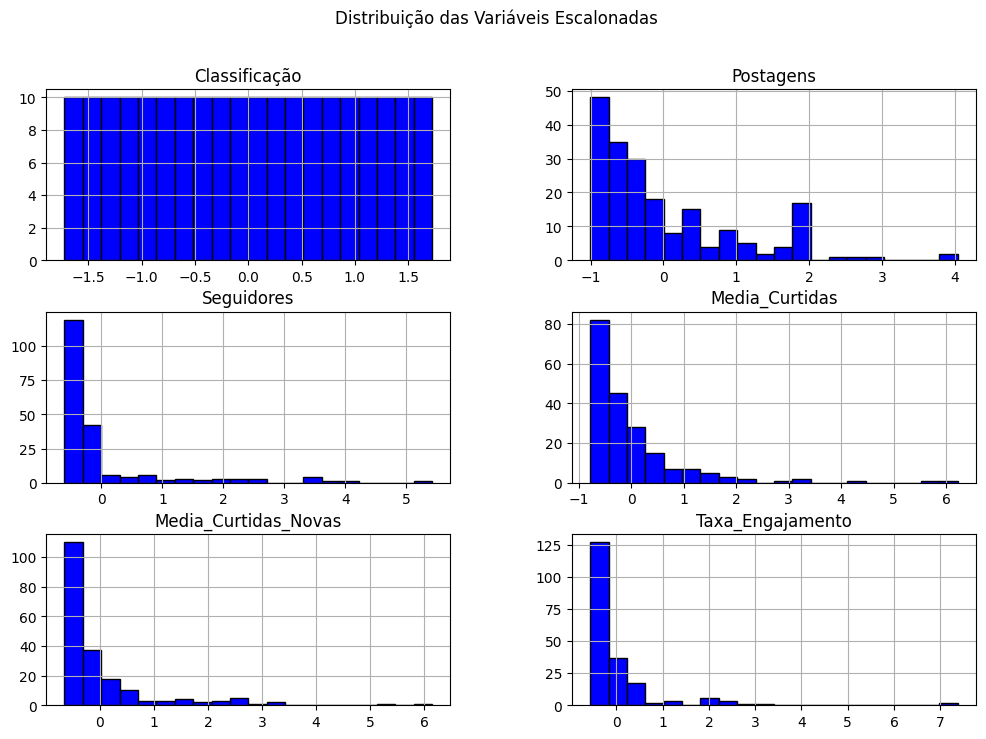

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=df_novo_analise.columns)

df_scaled.hist(figsize=(12, 8), bins=20, color="blue", edgecolor="black")
plt.suptitle("Distribuição das Variáveis Escalonadas")
plt.show()

In [ ]:
# Remover linhas com NaN na coluna 'Taxa_Engajamento' antes de dividir os dados
df_analise.dropna(subset=['Taxa_Engajamento'], inplace=True)


In [ ]:
# Separação das variáveis independentes e dependentes
X = df_analise[['Postagens', 'Seguidores', 'Media_Curtidas', 'Media_Curtidas_Novas']]
y = df_analise['Taxa_Engajamento']

# Dividindo o dataset em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implementação do Algoritmo de Regressão Linear
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibindo os coeficientes, interceptação e métricas de avaliação
print("Coeficientes: model.coef_   :", model.coef_)

print("Interceptação: model.intercept_  :", model.intercept_)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² (Coeficiente de Determinação):", r2)

Coeficientes: model.coef_   : [-1.68287465e-05 -1.47734964e-02  3.18971358e-03  3.19351592e-02]
Interceptação: model.intercept_  : 0.01881069182389937
Mean Absolute Error (MAE): 0.0035316215063415737
Mean Squared Error (MSE): 2.9076134877828277e-05
R² (Coeficiente de Determinação): 0.9528577922703302


<ipython-input-33-12d09adf9707>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')


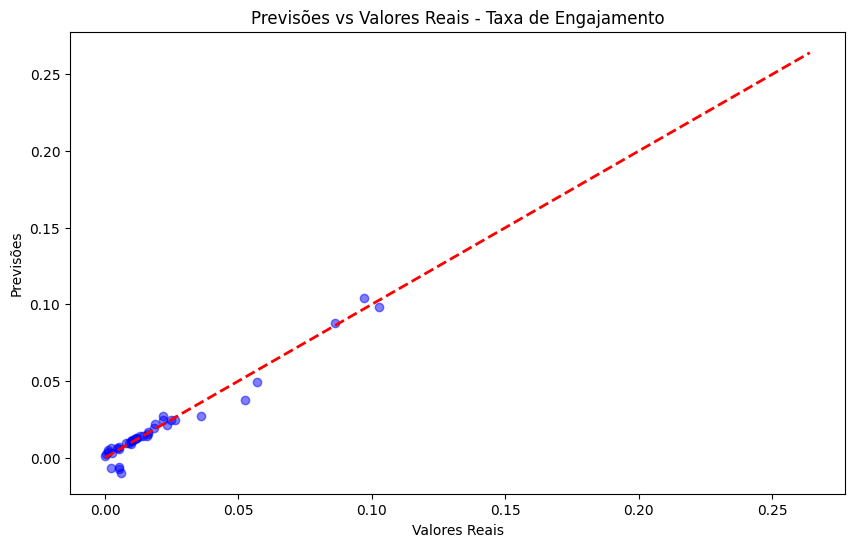

In [ ]:
# Visualização da previsão vs valor real
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs Valores Reais - Taxa de Engajamento')
plt.show()


# Otimização e Ajustes - 4

In [ ]:
modelo_ridge = Ridge(alpha=1.0).fit(X_train, y_train)
modelo_lasso = Lasso(alpha=0.1).fit(X_train, y_train)

### Validação Cruzada

In [ ]:
scores = cross_val_score(model,
                         X_train,
                         y_train,
                         cv=5)
print("Validação cruzada: ", scores.mean())

Validação cruzada:  0.816448307688957


# Análise e Visualização dos Resultados - 5

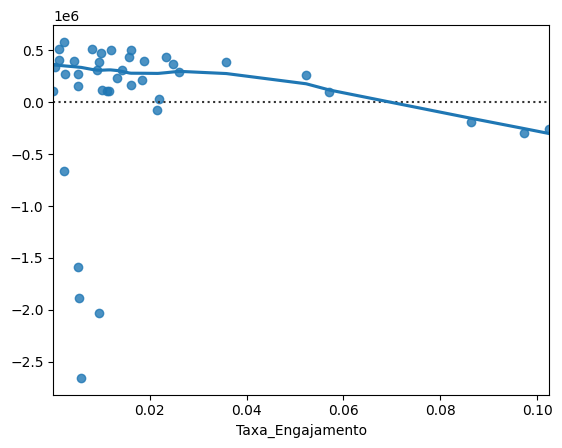

In [ ]:
sns.residplot(x = y_test,
              y = y_pred,
              lowess = True)
plt.show()

### Otimização do Código

Coeficientes: [-1.68287465e-05 -1.47734964e-02  3.18971358e-03  3.19351592e-02]
Interceptação: 0.01881069182389937
Mean Absolute Error (MAE): 0.0035316215063415737
Mean Squared Error (MSE): 2.9076134877828277e-05
Root Mean Squared Error (RMSE): 0.005392229119559765
R² (Coeficiente de Determinação): 0.9528577922703302
R² ajustado: 0.9518857879872442
Melhor alpha para Ridge: 1e-06
Melhor alpha para Lasso: 0.0001


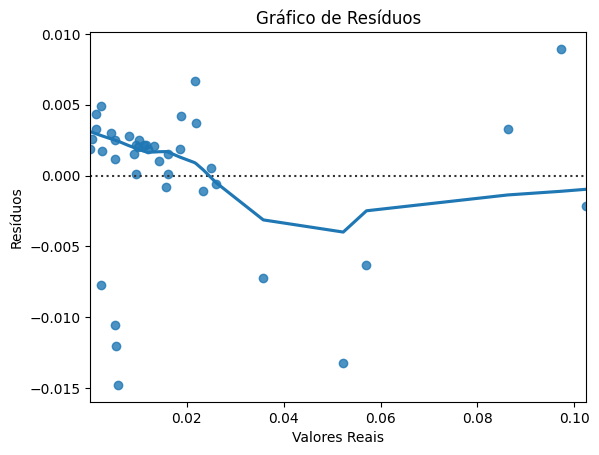

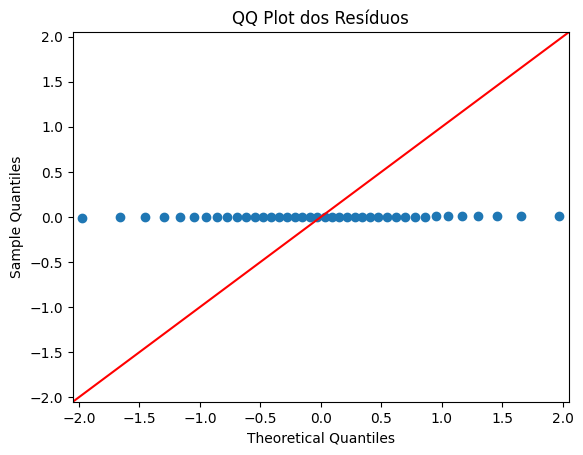

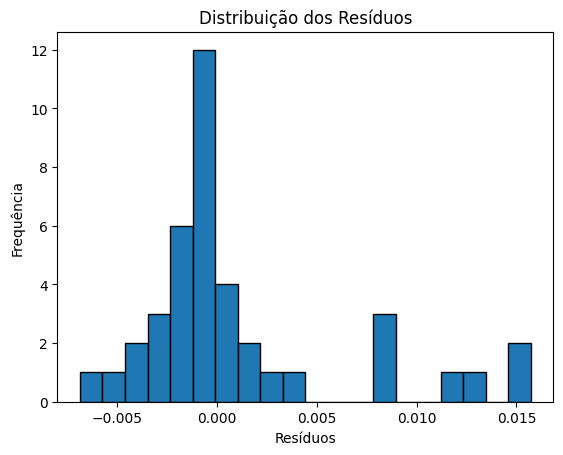

In [ ]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
import statsmodels.api as sm

# Preparação dos dados
df_analise.dropna(subset=['Taxa_Engajamento'], inplace=True)
X = df_analise[['Postagens', 'Seguidores', 'Media_Curtidas', 'Media_Curtidas_Novas']]
y = df_analise['Taxa_Engajamento']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ajuste do modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Avaliação com métricas adicionais
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print("Coeficientes:", model.coef_)
print("Interceptação:", model.intercept_)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² (Coeficiente de Determinação):", r2)
print("R² ajustado:", adjusted_r2)

# Otimização com Ridge e Lasso com validação cruzada
ridge_model = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5).fit(X_train_scaled, y_train)
lasso_model = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5).fit(X_train_scaled, y_train)

print("Melhor alpha para Ridge:", ridge_model.alpha_)
print("Melhor alpha para Lasso:", lasso_model.alpha_)

# Análise dos Resíduos
sns.residplot(x=y_test, y=y_pred, lowess=True)
plt.xlabel("Valores Reais")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos")
plt.show()

# Verificação da Normalidade dos Resíduos
residuals = y_test - y_pred
sm.qqplot(residuals, line="45")
plt.title("QQ Plot dos Resíduos")
plt.show()

# Distribuição dos Resíduos
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Distribuição dos Resíduos")
plt.show()
